In [1]:
import numpy as np

# EP : Binary tree

In [2]:
from binarytree import tree
t = tree(3, True)
print(t) 
display(t.properties)


          _______2_______
         /               \
    ____1__            ___6__
   /       \          /      \
  12        10       14       11
 /  \      /  \     /  \     /  \
4    13   8    3   7    5   9    0



{'height': 3,
 'size': 15,
 'is_max_heap': False,
 'is_min_heap': False,
 'is_perfect': True,
 'is_strict': True,
 'is_complete': True,
 'leaf_count': 8,
 'min_node_value': 0,
 'max_node_value': 14,
 'min_leaf_depth': 3,
 'max_leaf_depth': 3,
 'is_balanced': True,
 'is_bst': False,
 'is_symmetric': False}

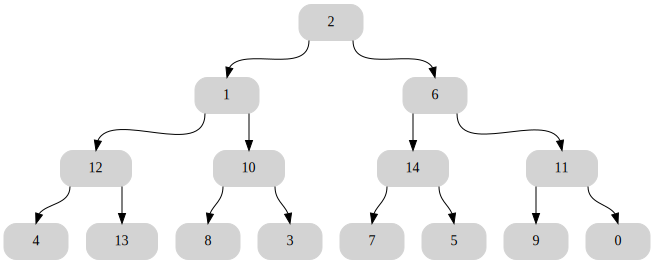

In [7]:
t

## MixIn

In [8]:
class ToDictMixin:
    def to_dict(self):
        return self._traverse_dict(self.__dict__)
    
    def _traverse_dict(self, instance_dict):
        output = {}
        for key, value in instance_dict.items():
            output[key] = self._traverse(key, value)
        return output
    
    def _traverse(self, key, value):
        if isinstance(value, ToDictMixin):
            return value.to_dict()
        elif isinstance(value, dict):
            return self._traverse_dict(value)
        elif isinstance(value, list):
            return [self._traverse(key, i) for i in value]
        elif hasattr(value, '__dict__'):
            return self._traverse_dict(value.__dict__)
        else:
            return value

class BinaryTree(ToDictMixin):
    def __init__(self, value, left=None, right=None):
        self.value = value
        self.left = left
        self.right = right

tree0 = BinaryTree(10,
    left=BinaryTree(7, right=BinaryTree(9)),
    right=BinaryTree(13, left=BinaryTree(11)))

# tree0.to_dict()
# import json
# print(json.dumps(tree.to_dict(), indent=4))


In [26]:
from binarytree import Node
class BT(Node, ToDictMixin):
    pass
BT(3, Node(5), Node(6)).to_dict()

{'val': 3,
 'value': 3,
 'left': {'val': 5, 'value': 5, 'left': None, 'right': None},
 'right': {'val': 6, 'value': 6, 'left': None, 'right': None}}

In [27]:
ToDictMixin.__dict__

mappingproxy({'__module__': '__main__',
              'to_dict': <function __main__.ToDictMixin.to_dict(self)>,
              '_traverse_dict': <function __main__.ToDictMixin._traverse_dict(self, instance_dict)>,
              '_traverse': <function __main__.ToDictMixin._traverse(self, key, value)>,
              '__dict__': <attribute '__dict__' of 'ToDictMixin' objects>,
              '__weakref__': <attribute '__weakref__' of 'ToDictMixin' objects>,
              '__doc__': None})

## Tree traversal

In [10]:
def tree_traversal(root):
    if root:
        print(f'Preorder: {root.value}')
        tree_traversal(root.left)
        tree_traversal(root.right)     
print(t)
tree_traversal(t)


          _______2_______
         /               \
    ____1__            ___6__
   /       \          /      \
  12        10       14       11
 /  \      /  \     /  \     /  \
4    13   8    3   7    5   9    0

Preorder: 2
Preorder: 1
Preorder: 12
Preorder: 4
Preorder: 13
Preorder: 10
Preorder: 8
Preorder: 3
Preorder: 6
Preorder: 14
Preorder: 7
Preorder: 5
Preorder: 11
Preorder: 9
Preorder: 0


In [21]:
tree?

Signature: tree(height=3, is_perfect=False)
Docstring:
Generate a random binary tree and return its root node.

:param height: Height of the tree (default: 3, range: 0 - 9 inclusive).
:type height: int
:param is_perfect: If set to True (default: False), a perfect binary tree
    with all levels filled is returned. If set to False, a perfect binary
    tree may still be generated by chance.
:type is_perfect: bool
:return: Root node of the binary tree.
:rtype: binarytree.Node
:raise binarytree.exceptions.TreeHeightError: If height is invalid.

**Example**:

.. doctest::

    >>> from binarytree import tree
    >>>
    >>> root = tree()
    >>>
    >>> root.height
    3

.. doctest::

    >>> from binarytree import tree
    >>>
    >>> root = tree(height=5, is_perfect=True)
    >>>
    >>> root.height
    5
    >>> root.is_perfect
    True

.. doctest::

    >>> from binarytree import tree
    >>>
    >>> root = tree(height=20)  # doctest: +IGNORE_EXCEPTION_DETAIL
    Traceback (most rece

In [7]:
f = lambda x: 2/(1+np.exp(0.066*x))
f(80)

0.010133258666932508

In [22]:
# !mv puzzles.ipynb array_string.ipynb